In [35]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model

In [36]:
datagen = ImageDataGenerator(rescale=1./255,
                                      zoom_range=0.2,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      validation_split=0.2
                                      )
train_data = datagen.flow_from_directory('C:/Users/Nithin R/Downloads/Dataset-3/train',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'training')

valid_data = datagen.flow_from_directory('C:/Users/Nithin R/Downloads/Dataset-3/train',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'validation')

Found 2403 images belonging to 5 classes.
Found 600 images belonging to 5 classes.


In [38]:
import efficientnet.tfkeras as efn

In [39]:
def lr_rate(epoch,lr):
    if epoch<10:
        lr=0.0001
        return lr
    elif epoch<=15:
        lr=0.0005
        return lr
    elif epoch<=30:
        lr=0.0001
        return lr
    else:
        lr=lr*(epoch/(1+epoch))
        return lr
lr_callback=tf.keras.callbacks.LearningRateScheduler(lr_rate)

In [40]:
model = tf.keras.Sequential([
        efn.EfficientNetB0(
            input_shape=(224,224, 3),
            weights='imagenet',
            include_top=False
        ),tf.keras.layers.Flatten(),tf.keras.layers.Dense(5, activation='softmax')
    ])

model.compile(optimizer="Adam",loss='categorical_crossentropy',metrics=['acc'])


In [42]:

history=model.fit_generator(train_data,validation_data = valid_data,callbacks=[lr_callback],epochs=40,verbose=1)


C:\Users\Nithin R\AppData\Local\Temp\ipykernel_33812\4254405513.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_data,validation_data = valid_data,callbacks=[lr_callback],epochs=40,verbose=1)


Epoch 1/40


KeyboardInterrupt: 

In [43]:
import matplotlib.pyplot as plt

In [44]:
def display_training_curves(training, validation, title, subplot):

    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

C:\Users\Nithin R\AppData\Local\Temp\ipykernel_33812\2188891192.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


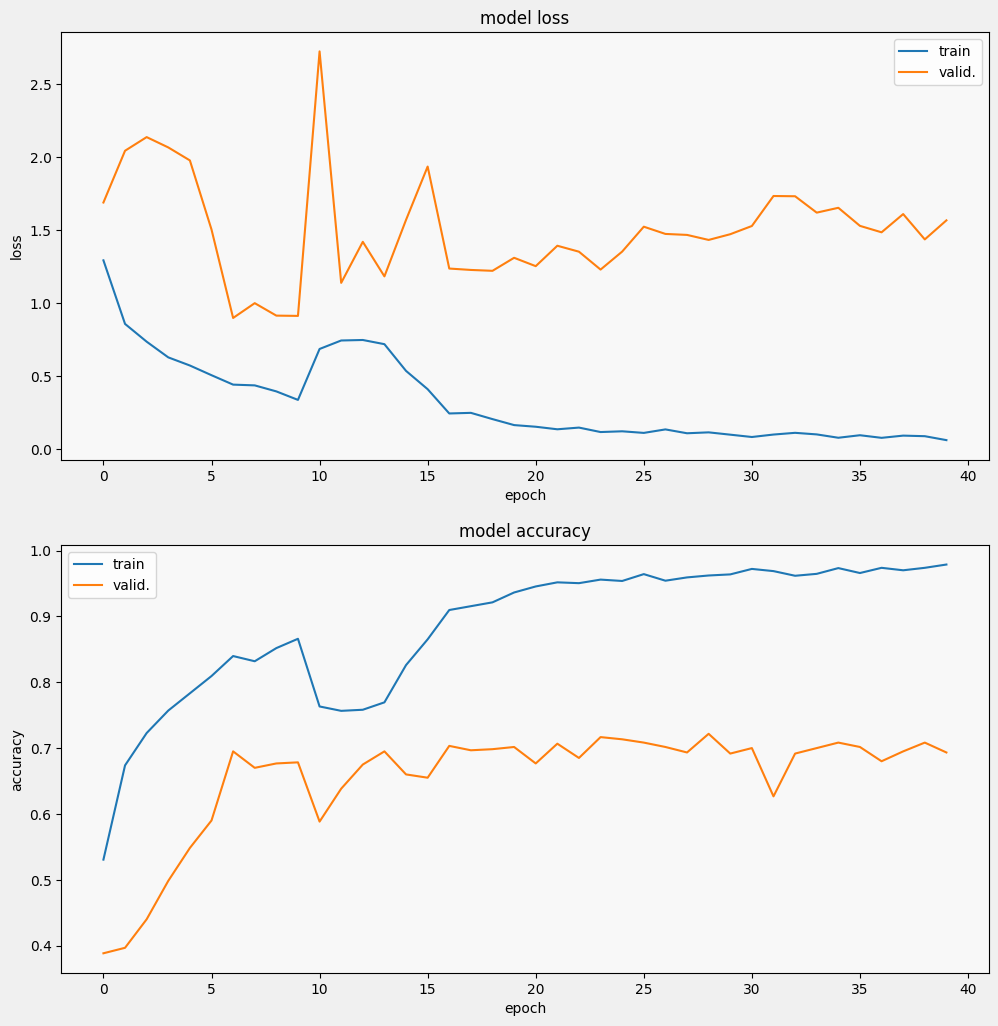

In [45]:
display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'loss', 211)
display_training_curves(
    history.history['acc'],
    history.history['val_acc'],
    'accuracy', 212)

In [46]:
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model

In [47]:
# save the trained model to use
model.save('modelDR.h5')

c:\Users\Nithin R\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [48]:
# get class names associated with dataset images
categories = ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']
print(categories)

['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']


In [49]:
import numpy as np

1/1 [==============================] - 1s 1s/step
3


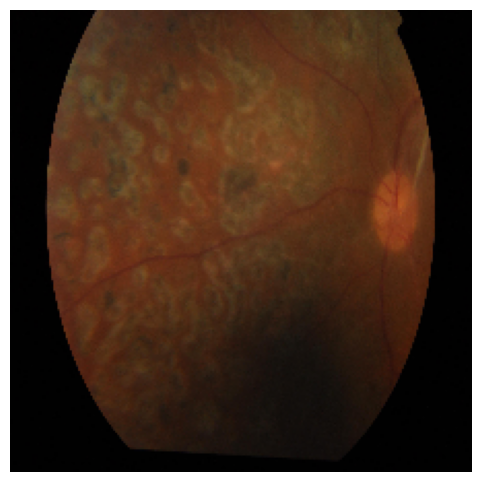

Predicted case -> Proliferate_DR


In [50]:
# Testing the model using sample image
image_path = "C:/Users/Nithin R/Downloads/Dataset-3/test/Proliferate_DR/26463a5fb949.png"
image = tf.keras.preprocessing.image.load_img(image_path)
image = image.resize((224,224))
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = image_array / 255.0
scaled_img = np.expand_dims(image_array, axis=0)
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis("off")

# Use model to predict the sample image
pred = model.predict(scaled_img)

# show the output of predicted image
print(np.argmax(pred))
output = categories[np.argmax(pred)]
plt.show()
print("Predicted case ->", output)